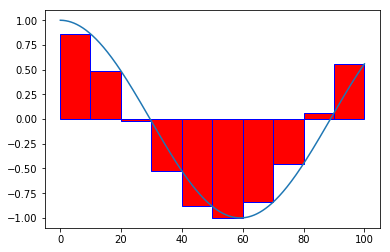

right hand approximation: -17.47196152416554


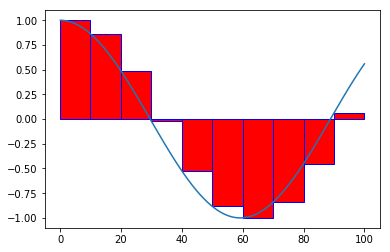

left hand approximation: -13.05861545269617


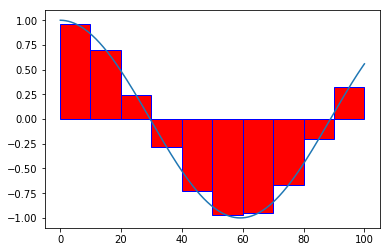

midpoint approximation: -15.818544721488387


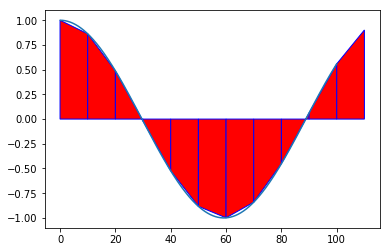

trapezoid approximation: -15.265288488430853


In [53]:
import math

def f(x):
    return math.cos(x/(6*math.pi))

def initialize(a,b,n):
    width = (b-a)/n
    x_list = []
    y_list = []
    area = 0
    return [width, x_list, y_list, area]
    

def right_hand(function, a, b, n):
    #initialize
    [width, x_list, y_list, area] = initialize(a,b,n)

    x = a
    for i in range(n):
        x += width
        x_list.append(x)
    
    for x in x_list:
        y = f(x)
        y_list.append(y)
    
    for y in y_list:
        area += width*y
        
    plot_reimann(a,b,f,x_list, y_list, width,'right_hand')
    return area

def left_hand(function, a, b, n):
    #initialize
    [width, x_list, y_list, area] = initialize(a,b,n)

    x = a
    for i in range(n):
        x_list.append(x)
        x += width
    
    for x in x_list:
        y = f(x)
        y_list.append(y)
    
    for y in y_list:
        area += width*y
        
    plot_reimann(a,b,f,x_list, y_list, width,'left_hand')
    return area

def midpoint(function, a, b, n):
    #initialize
    [width, x_list, y_list, area] = initialize(a,b,n)

    x = a+width/2
    for i in range(n):
        x_list.append(x)
        x += width
    
    for x in x_list:
        y = f(x)
        y_list.append(y)
    
    for y in y_list:
        area += width*y
    
    plot_reimann(a,b,f,x_list, y_list, width,'midpoint')
    return area

def trapezoid(function, a, b, n):
    #initialize
    [width, x_list, y_list, area] = initialize(a,b,n)
    
    x = a
    for i in range(n+1):
        x_list.append(x)
        x += width
    
    for x in x_list:
        y = f(x)
        y_list.append(y)
        
    for i in range(n):
        area += width*(y_list[i]+y_list[i+1])/2
    
    plot_reimann(a,b,f,x_list, y_list, width,'trapezoid')
    return area

def plot_reimann(a,b,f,x_list, y_list, width, type):
    #Plot the function and rectangles.
    from matplotlib import pyplot as plt
    from matplotlib import patches

    for x in x_list:
        if type == "right_hand":
            x_val = x - width
            rectangle = plt.Rectangle((x_val, 0), width, f(x), fc='r', ec = 'b')
            plt.gca().add_patch(rectangle)
        elif type == "left_hand":
            x_val = x
            rectangle = plt.Rectangle((x_val, 0), width, f(x), fc='r', ec = 'b')
            plt.gca().add_patch(rectangle)
        elif type == "midpoint":
            x_val = x - width/2
            rectangle = plt.Rectangle((x_val, 0), width, f(x), fc='r', ec = 'b')
            plt.gca().add_patch(rectangle)
        elif type == "trapezoid":
            x_val = x
            x1 = x
            x2 = x+width
            y1 = f(x1)
            y2 = f(x2)
            x_s = [x1, x2, x2, x1]
            y_s = [0, 0, y2, y1]
            
            trapezoid = plt.Polygon(xy=list(zip(x_s,y_s)), fc='r', ec = 'b')
            plt.gca().add_patch(trapezoid)
        
               
    x_vals = []
    y_vals = []
    x = a
    N = 1000
    for i in range(N):
        w = (b-a)/N
        x += w
        y = f(x)
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals)
    plt.show()   
    
a = 0
b = 100
N = 10

    
print("right hand approximation:", right_hand(f,a,b,N))
print("left hand approximation:", left_hand(f,a,b,N))
print("midpoint approximation:", midpoint(f,a,b,N))
print("trapezoid approximation:", trapezoid(f,a,b,N))
        

# Right Hand